#   **Pattern recognition course | ECE AUTH | 3nd project | Winter semester 2022**

# **Floriculture Laboratory of the Department of Agriculture**

![ logo](iris.png)



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [2]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from sklearn.datasets import load_iris

# **Part A**

## **Iris plants dataset**

In [3]:
# import dataset
dataset = load_iris(as_frame=True)

# show dataset summary statistics
dataset['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# show dataset statistics
dataset['data'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# show how many values we have in each class
dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### **No normalization is needed**

<AxesSubplot: >

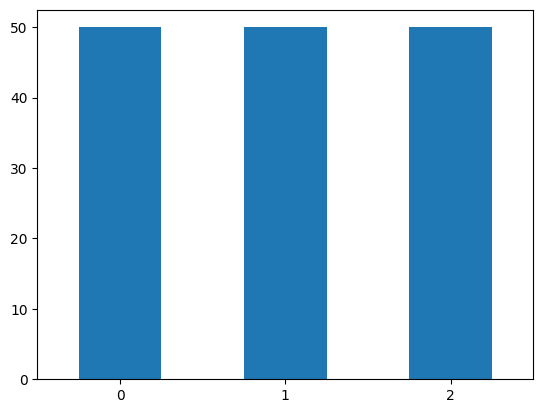

In [5]:
# data quantity vizualization
dataset.target.value_counts().plot(kind='bar', rot=0)

### **Pandas is in the game**
### **Discarding the unnecessary data**

In [70]:
# convert to pandas dataframe (giati h zwh na einai toso dyskolh???)
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# discard what I don't need (2 and 3 are the columns we do not need)
df.drop(df.columns[[2, 3]], axis=1, inplace=True)
# print(df) # just checking

X = df.get(["sepal length (cm)", "sepal width (cm)"])
y = df.get("target")

# just checking
print(X)
print(y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


### **Training and testing sets**

In [71]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

print("The X_train set is:")
print(X_train)

print("The X_test set is:")
print(X_test)

print("The y_train set is:")
print(y_train)

print("The y_test set is:")
print(y_test)

The X_train set is:
     sepal length (cm)  sepal width (cm)
84                 5.4               3.0
148                6.2               3.4
53                 5.5               2.3
5                  5.4               3.9
93                 5.0               2.3
..                 ...               ...
71                 6.1               2.8
106                4.9               2.5
14                 5.8               4.0
92                 5.8               2.6
102                7.1               3.0

[75 rows x 2 columns]
The X_test set is:
     sepal length (cm)  sepal width (cm)
73                 6.1               2.8
18                 5.7               3.8
118                7.7               2.6
78                 6.0               2.9
76                 6.8               2.8
..                 ...               ...
113                5.7               2.5
33                 5.5               4.2
138                6.0               3.0
101                5.8              

### **Training and testing**

In [72]:
from sklearn import tree
from sklearn import metrics

accuracy_list = list()

for depth in range(1, 20):
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
  accuracy_list.append(accuracy)

accuracy_array = np.array(accuracy_list)
print(f"Accuracy based on depth: {accuracy_list}")
best_accuracy = max(accuracy_list)
best_depth = np.argmax(accuracy_array) + 1
print(f"Best Accuracy is: {best_accuracy}% and is achived in depth: {best_depth}")

Accuracy based on depth: [64.0, 77.33, 78.67, 77.33, 77.33, 77.33, 72.0, 73.33, 73.33, 74.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67, 70.67]
Best Accuracy is: 78.67% and is achived in depth: 3


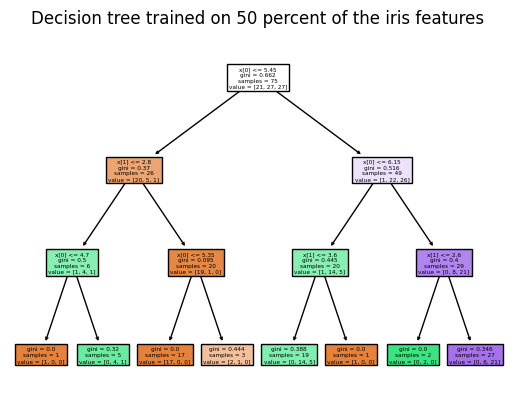

In [73]:
from sklearn import tree

# train the tree
clf = tree.DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)

# vizualize the tree
plt.figure()
tree.plot_tree(clf, filled=True)
plt.title("Decision tree trained on 50 percent of the iris features")
plt.show()

### **Prediction**

In [74]:
y_pred = clf.predict(X_test)

### **Results**

**Accuracy**

In [75]:
# print("Accuracy:", round(skl.metrics.accuracy_score(y_test, y_pred) * 100, 2), "%")
print(f"Accuracy: {best_accuracy}%")

Accuracy: 78.67%


**Classification report**

In [76]:
print(skl.metrics.classification_report(y_test, y_pred, target_names=dataset.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.97      0.98        29
  versicolor       0.64      0.70      0.67        23
   virginica       0.68      0.65      0.67        23

    accuracy                           0.79        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.79      0.79      0.79        75



**Confusion matrix**

[28  1  0  0 16  7  0  8 15]


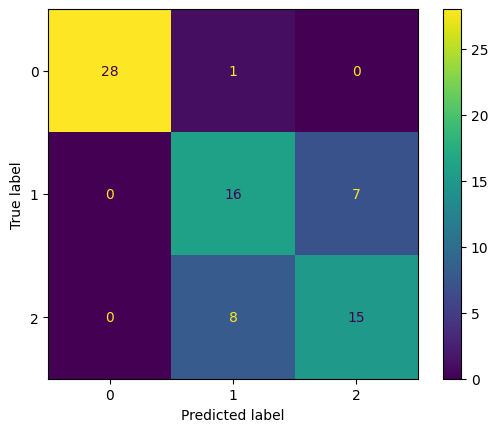

In [77]:
results = skl.metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_).ravel()
print(results)

disp = skl.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [84]:
X_data = pd.DataFrame.to_numpy(X_test)
y_data = pd.Series.to_numpy(y_test)
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [103]:
y_data

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

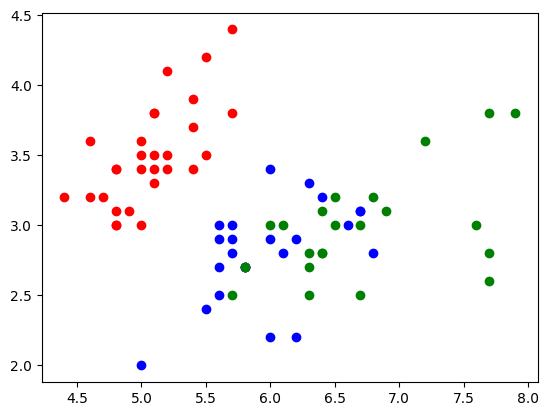

In [107]:
color = "white"
for i in range(len(y_data)):
    if y_data[i] == 0:
        color = "red"
    elif y_data[i] == 1:
        color = "blue"
    else:
        color = "green"
    plt.scatter(X_data[i][0], X_data[i][1], color=color)
    # plt.contourf()